In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


from sklearn import set_config

os.chdir('/home/handsome/Desktop/2023/Optiver-Trading-at-the-Close')

sns.set_theme(style = 'white', palette = 'viridis')
pal = sns.color_palette('viridis')

pd.set_option('display.max_rows', 100)
set_config(transform_output = 'pandas')
pd.options.mode.chained_assignment = None

##### **DATA COLUMNS:** <br>
1. **stock_id -** A unique identifier for the stock. Not all stock IDs exist in every time bucket.  <br>
2. **date_id -** A unique identifier for the date. Date IDs are sequential & consistent across all stocks.  <br>
3. **imbalance_size -** The amount unmatched at the current reference price (in USD).  <br>
4. **imbalance_buy_sell_flag -** An indicator reflecting the direction of auction imbalance. <br>
buy-side imbalance; 1  <br>
sell-side imbalance; -1 <br>
no imbalance; 0 <br>
5. **reference_price -** The price at which paired shares are maximized, the imbalance is minimized and the distance from the bid-ask midpoint is minimized, in that order. Can also be thought of as being equal to the near price bounded between the best bid and ask price. <br>
6. **matched_size -** The amount that can be matched at the current reference price (in USD). <br>
7. **far_price -** The crossing price that will maximize the number of shares matched based on auction interest only. This calculation excludes continuous market orders. <br>
8. **near_price -** The crossing price that will maximize the number of shares matched based auction and continuous market orders. <br>
9. **[bid/ask]_price -** Price of the most competitive buy/sell level in the non-auction book. <br>
10. **[bid/ask]_size -** The dollar notional amount on the most competitive buy/sell level in the non-auction book. <br>
11. **wap -** The weighted average price in the non-auction book. <br> 
12. **seconds_in_bucket -** The number of seconds elapsed since the beginning of the day's closing auction, always starting from 0. <br>
13. **target** - The 60 second future move in the wap of the stock, less the 60 second future move of the synthetic index. Only provided for the train set. <br>

train = pd.read_csv(r'./data/train.csv')

In [4]:
train.head(10)

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id,row_id
0,0,0,0,3180602.69,1,0.999812,13380276.64,NaN,NaN,0.999812,60651.50,1.000026,8493.03,1.0,-3.029704,0,0_0_0
1,1,0,0,166603.91,-1,0.999896,1642214.25,NaN,NaN,0.999896,3233.04,1.000660,20605.09,1.0,-5.519986,0,0_0_1
2,2,0,0,302879.87,-1,0.999561,1819368.03,NaN,NaN,0.999403,37956.00,1.000298,18995.00,1.0,-8.389950,0,0_0_2
3,3,0,0,11917682.27,-1,1.000171,18389745.62,NaN,NaN,0.999999,2324.90,1.000214,479032.40,1.0,-4.010200,0,0_0_3
4,4,0,0,447549.96,-1,0.999532,17860614.95,NaN,NaN,0.999394,16485.54,1.000016,434.10,1.0,-7.349849,0,0_0_4
5,5,0,0,0.00,0,1.000635,13552875.92,NaN,NaN,0.999779,1962.72,1.000635,5647.65,1.0,6.779432,0,0_0_5
6,6,0,0,969969.40,1,1.000115,3647503.98,NaN,NaN,0.999506,6663.16,1.000283,3810.48,1.0,-2.499819,0,0_0_6
7,7,0,0,9412959.10,1,0.999818,21261245.87,NaN,NaN,0.999741,5139.20,1.000130,2570.60,1.0,-1.959801,0,0_0_7
8,8,0,0,2394875.85,1,0.999916,9473209.08,NaN,NaN,0.999022,52011.60,1.000041,2169.36,1.0,-5.970001,0,0_0_8
9,9,0,0,3039700.65,-1,1.000969,6248958.45,NaN,NaN,0.999354,6191.00,1.000646,6199.00,1.0,7.970333,0,0_0_9


## Statistics of training data

In [5]:
desc = pd.DataFrame(index = list(train))
desc['count'] = train.count()
desc['nunique'] = train.nunique()
desc['%unique'] = desc['nunique'] / len(train) * 100
desc['null'] = train.isnull().sum()
desc['type'] = train.dtypes
desc = pd.concat([desc, train.describe().T], axis = 1)
desc

,count,nunique,%unique,null,type,count,mean,std,min,25%,50%,75%,max
stock_id,5237980,200,0.003818,0,int64,5237980.0,9.928856e+01,5.787176e+01,0.000000,4.900000e+01,9.900000e+01,1.490000e+02,1.990000e+02
date_id,5237980,481,0.009183,0,int64,5237980.0,2.415100e+02,1.385319e+02,0.000000,1.220000e+02,2.420000e+02,3.610000e+02,4.800000e+02
seconds_in_bucket,5237980,55,0.001050,0,int64,5237980.0,2.700000e+02,1.587451e+02,0.000000,1.300000e+02,2.700000e+02,4.100000e+02,5.400000e+02
imbalance_size,5237760,2971863,56.736815,220,float64,5237760.0,5.715293e+06,2.051591e+07,0.000000,8.453415e+04,1.113604e+06,4.190951e+06,2.982028e+09
imbalance_buy_sell_flag,5237980,3,0.000057,0,int64,5237980.0,-1.189619e-02,8.853374e-01,-1.000000,-1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
reference_price,5237760,28741,0.548704,220,float64,5237760.0,9.999955e-01,2.532497e-03,0.935285,9.987630e-01,9.999670e-01,1.001174e+00,1.077488e+00
matched_size,5237760,2948862,56.297695,220,float64,5237760.0,4.510025e+07,1.398413e+08,4316.610000,5.279575e+06,1.288264e+07,3.270013e+07,7.713682e+09
far_price,2343638,95739,1.827785,2894342,float64,2343638.0,1.001713e+00,7.214705e-01,0.000077,9.963320e-01,9.998830e-01,1.003318e+00,4.379531e+02
near_price,2380800,84625,1.615604,2857180,float64,2380800.0,9.996601e-01,1.216920e-02,0.786988,9.971000e-01,9.998890e-01,1.002590e+00,1.309732e+00
bid_price,5237760,28313,0.540533,220,float64,5237760.0,9.997263e-01,2.499345e-03,0.934915,9.985290e-01,9.997280e-01,1.000905e+00,1.077488e+00


In [6]:
train.columns

Index(['stock_id', 'date_id', 'seconds_in_bucket', 'imbalance_size',
       'imbalance_buy_sell_flag', 'reference_price', 'matched_size',
       'far_price', 'near_price', 'bid_price', 'bid_size', 'ask_price',
       'ask_size', 'wap', 'target', 'time_id', 'row_id'],
      dtype='object')

In [7]:
num_vars = ['date_id', 'seconds_in_bucket', 'imbalance_size', 'reference_price', 'matched_size',
       'far_price', 'near_price', 'bid_price', 'bid_size', 'ask_price', 'ask_size', 'wap', 'target'] 
cat_vars = ['stock_id', 'imbalance_buy_sell_flag', 'time_id']

## Distribution of features

/home/handsome/miniconda3/envs/tf/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


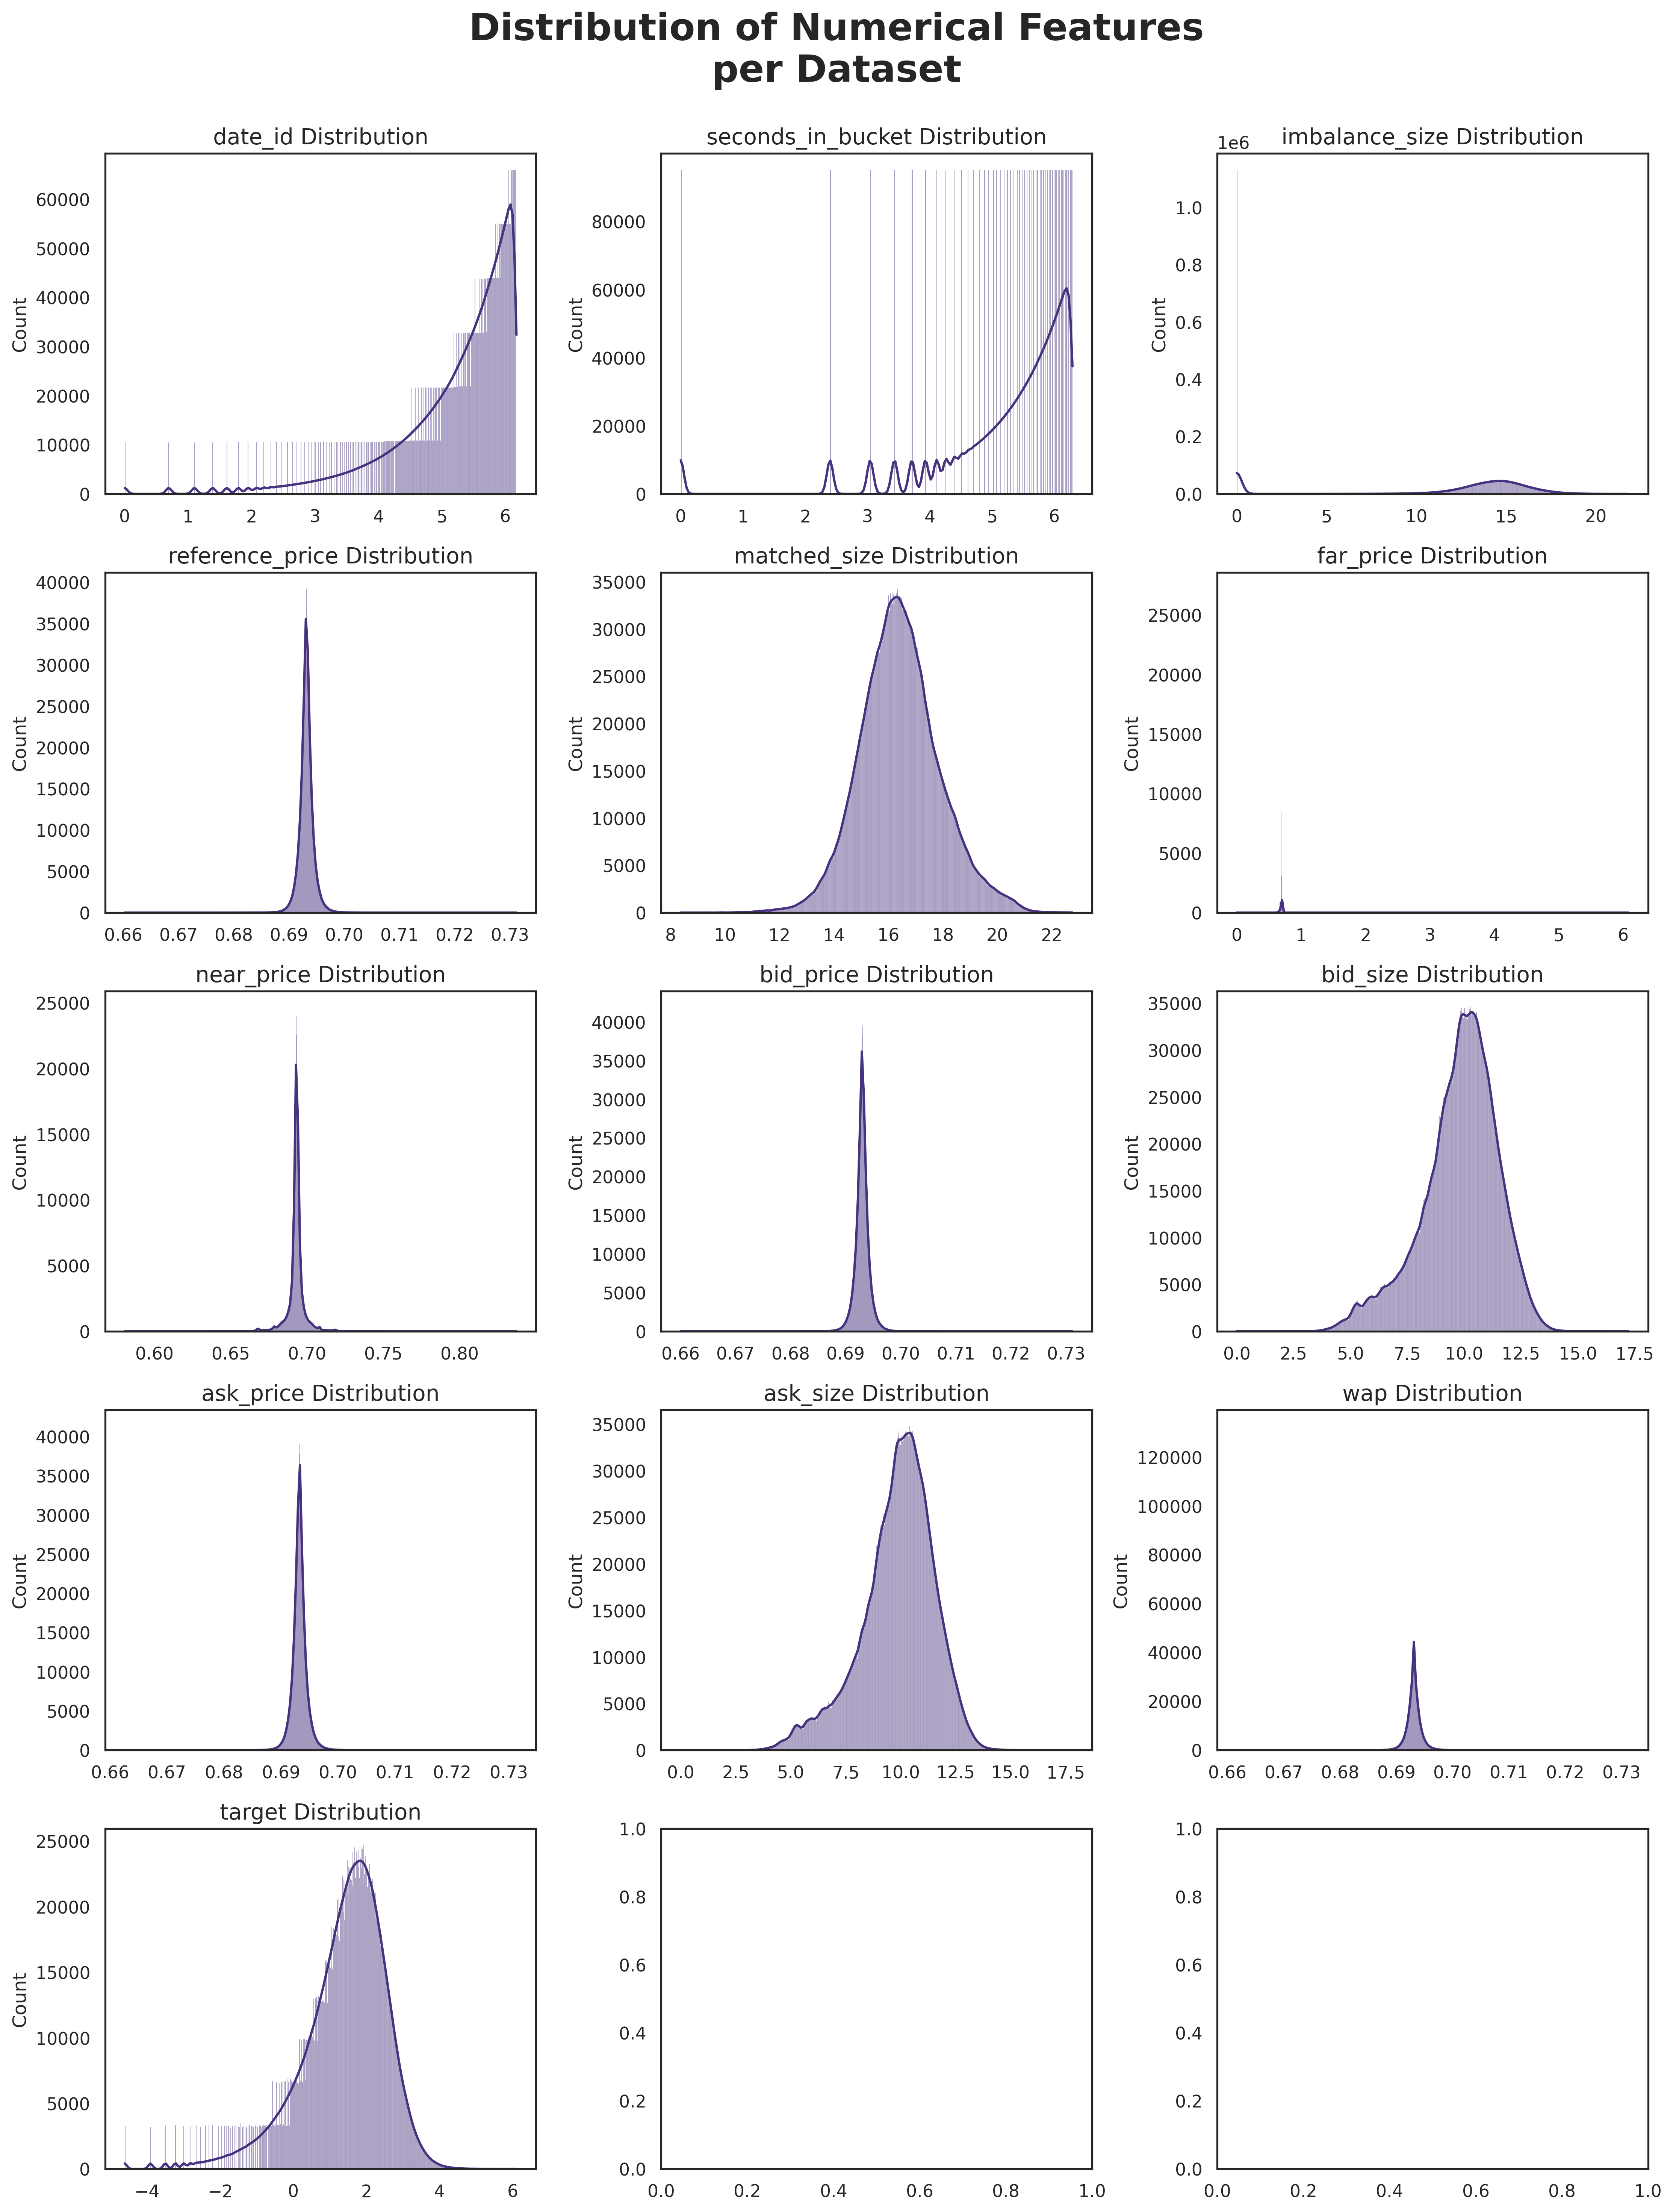

In [42]:
fig, ax = plt.subplots(5, 3, figsize = (15, 20), dpi = 300)
ax = ax.flatten()

for i, column in enumerate(num_vars):
    
    sns.histplot(np.log1p(train[column]), ax=ax[i], color=pal[0], kde = True)
    
    ax[i].set_title(f'{column} Distribution', size = 14)
    ax[i].set_xlabel(None)
    
fig.suptitle('Distribution of Numerical Features', fontsize = 24, fontweight = 'bold')
plt.tight_layout()

In [47]:
sum((1+train['target'])<0)

2310643

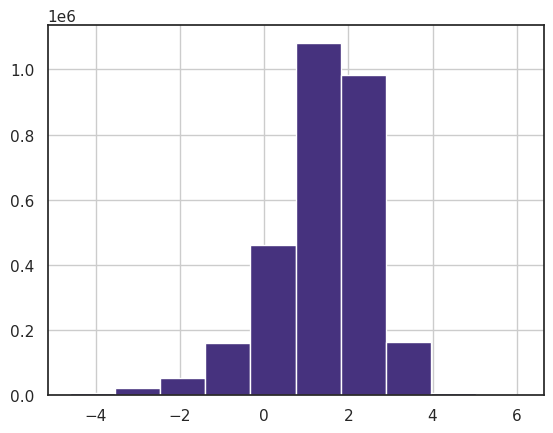

In [46]:
(np.log(1+train['target'])).hist()
plt.show()

In [35]:
train['imbalance_size'].describe()

count    5.237760e+06
mean     5.715293e+06
std      2.051591e+07
min      0.000000e+00
25%      8.453415e+04
50%      1.113604e+06
75%      4.190951e+06
max      2.982028e+09
Name: imbalance_size, dtype: float64

<Axes: >

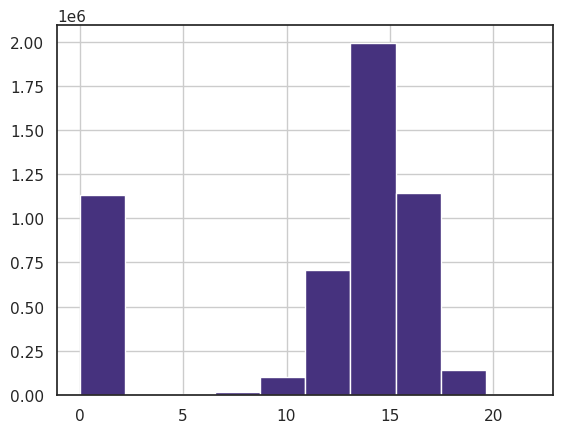

In [36]:
np.log1p(train['imbalance_size']).hist()

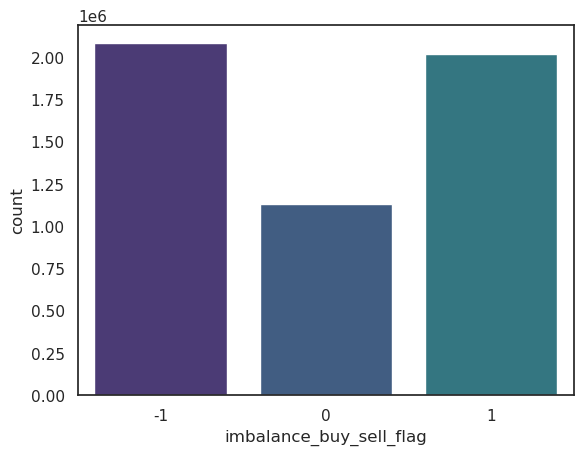

In [17]:
sns.countplot(x = train['imbalance_buy_sell_flag'])
plt.show()

In [24]:
train.head()

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id,row_id
0,0,0,0,3180602.69,1,0.999812,13380276.64,NaN,NaN,0.999812,60651.50,1.000026,8493.03,1.0,-3.029704,0,0_0_0
1,1,0,0,166603.91,-1,0.999896,1642214.25,NaN,NaN,0.999896,3233.04,1.000660,20605.09,1.0,-5.519986,0,0_0_1
2,2,0,0,302879.87,-1,0.999561,1819368.03,NaN,NaN,0.999403,37956.00,1.000298,18995.00,1.0,-8.389950,0,0_0_2
3,3,0,0,11917682.27,-1,1.000171,18389745.62,NaN,NaN,0.999999,2324.90,1.000214,479032.40,1.0,-4.010200,0,0_0_3
4,4,0,0,447549.96,-1,0.999532,17860614.95,NaN,NaN,0.999394,16485.54,1.000016,434.10,1.0,-7.349849,0,0_0_4


In [25]:
def get_bid_ask_spread(data):
    spread = (data['ask_price'] - data['bid_price']) / (data['ask_price'] - data['bid_price'])
    return spread

In [29]:
def get_wap(df):
    wap1 = (df['bid_price'] * df['ask_size'] + df['ask_price'] * df['bid_size'])/(df['bid_size'] + df['ask_size'])
    return wap1

In [30]:
def get_imbalance_volume(df):
    imbalance_volume = abs(df['ask_size'] - df['bid_size'])
    return imbalance_volume

In [31]:
def get_most_competitive_volume(df):
    most_competitive_volume = df['ask_size'] + df['bid_size']
    return most_competitive_volume

In [48]:
def log_return(list_stock_prices):
    return np.log(list_stock_prices).diff() 